# Part Ⅰ:2D 数据点绘图

## 一、导包&导入数据

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [72]:
df = pd.read_csv('../data/学习行为.csv')
# df.head()
# df.shape
# df.info
df.dtypes
# df.columns

_id                                                   object
basicFactData.basicFactDataId                         object
basicFactData.createTimeDate                          object
basicFactData.dataValue.activityDateList              object
basicFactData.dataValue.code                           int64
                                                       ...  
supervisionOnlineCourseBehaviorExt.timeLength          int64
supervisionOnlineCourseBehaviorExt.totalTimeLength     int64
updateTime                                            object
userIdentifier                                        object
userSupervisionFactId                                 object
Length: 121, dtype: object

## 二、学习行为-数据预处理
### 2-1 转换值类型:将被误判为 object 类型的日期时间列转换为 datetime64

In [56]:
time_col = [col for col in df.columns if 'Time' in col]
for col in time_col:
    df[col] = pd.to_datetime(df[col])

df.dtypes
# df.columns

_id                                                                object
basicFactData.basicFactDataId                                      object
basicFactData.createTimeDate                          datetime64[ns, UTC]
basicFactData.dataValue.activityDateList                           object
basicFactData.dataValue.code                                        int64
                                                             ...         
supervisionOnlineCourseBehaviorExt.timeLength                       int64
supervisionOnlineCourseBehaviorExt.totalTimeLength         datetime64[ns]
updateTime                                            datetime64[ns, UTC]
userIdentifier                                                     object
userSupervisionFactId                                              object
Length: 121, dtype: object

### 2-2 抽取部分特征:只要数值型+日期数据
Pandas 提供了`select_dtypes()` 可以方便地选择特定数据类型的列。

In [64]:
# 包含数值+日期
feature_df = df.select_dtypes(exclude=['object'])
# 只有数值
number_df = df.select_dtypes(include=['number'])

complete_df = pd.concat([df['_id'], feature_df], axis=1)
only_number_df = pd.concat([df['_id'], number_df], axis=1)

complete_df.head()

,_id,basicFactData.createTimeDate,basicFactData.dataValue.code,basicFactData.dataValue.coursePeriod,basicFactData.dataValue.effective,basicFactData.dataValue.idCardType,basicFactData.dataValue.timeLength,basicFactData.updateTimeDate,behaviorInterruptRecoveryRecord.0.interruptRecoveryTime,behaviorInterruptRecoveryRecord.0.interruptRecoveryType,...,endTime,isValid,owner.unitId,startTime,status,supervisionBehaviorType,supervisionOnlineCourseBehaviorExt.accumulateTime,supervisionOnlineCourseBehaviorExt.timeLength,supervisionOnlineCourseBehaviorExt.totalTimeLength,updateTime
0,2c9082b990642dcb019070cf5fd545a6,2024-07-05 04:25:09.879000+00:00,200,5.3,True,0,15900,2024-07-05 04:25:09.879000+00:00,2024-07-02 00:19:17.045000+00:00,0,...,2024-07-02 00:34:38.868000+00:00,1,-1,2024-07-02 00:19:17.045000+00:00,3,1,NaT,442,1970-01-01,2024-07-05 04:25:22.024000+00:00
1,2c9082b990642dcb019070e51ca84a88,2024-07-05 04:25:29.355000+00:00,200,5.3,True,0,15900,2024-07-05 04:25:29.355000+00:00,2024-07-02 00:43:01.652000+00:00,0,...,2024-07-02 01:42:38.868000+00:00,1,-1,2024-07-02 00:43:01.652000+00:00,3,1,NaT,2533,1970-01-01,2024-07-05 04:26:29.711000+00:00
2,2c9082ce9064171c01906d21705217f1,2024-07-05 04:21:30.509000+00:00,200,10.0,True,0,30000,2024-07-05 04:21:30.509000+00:00,2024-07-01 07:10:26.374000+00:00,0,...,2024-07-01 08:12:20.970000+00:00,1,-1,2024-07-01 07:10:26.374000+00:00,3,1,NaT,2165,1970-01-01,2024-07-05 04:22:11.562000+00:00
3,2c9082b990642dcb01907137df9e5ec8,2024-07-05 04:27:11.560000+00:00,200,2.4,True,0,7200,2024-07-05 04:27:11.560000+00:00,2024-07-02 02:13:25.521000+00:00,0,...,2024-07-02 02:25:11.447000+00:00,1,-1,2024-07-02 02:13:25.521000+00:00,3,1,NaT,550,1970-01-01,2024-07-05 04:27:27.114000+00:00
4,2c9082ce9064171c019070cb416e3d9f,2024-07-05 04:25:06.572000+00:00,200,10.0,True,0,30000,2024-07-05 04:25:06.572000+00:00,2024-07-02 00:14:47.118000+00:00,0,...,2024-07-02 05:38:40.971000+00:00,1,-1,2024-07-02 00:14:47.118000+00:00,3,1,NaT,11579,1970-01-01,2024-07-05 04:31:15.586000+00:00


---
## 三、监管记录-数据预处理

In [71]:
df_monitor = pd.read_csv('../data/监管记录.csv')

'''
正则表达式:
^       匹配字符串的开始;
(?!...) 用于排除匹配的字符串;
.*      匹配任意字符;
Id      匹配 Id 结尾的字符串;
'''
df_exclude_id = df_monitor.filter(regex='^(?!.*Id$)')

## 四、绘制 2D 数据点

In [19]:
plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = df['basicFactData.dataValue.coursePeriod']  # dtypes: float64
y = df['basicFactData.dataValue.timeLength'] / 1000  # dtypes: int64

In [20]:
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

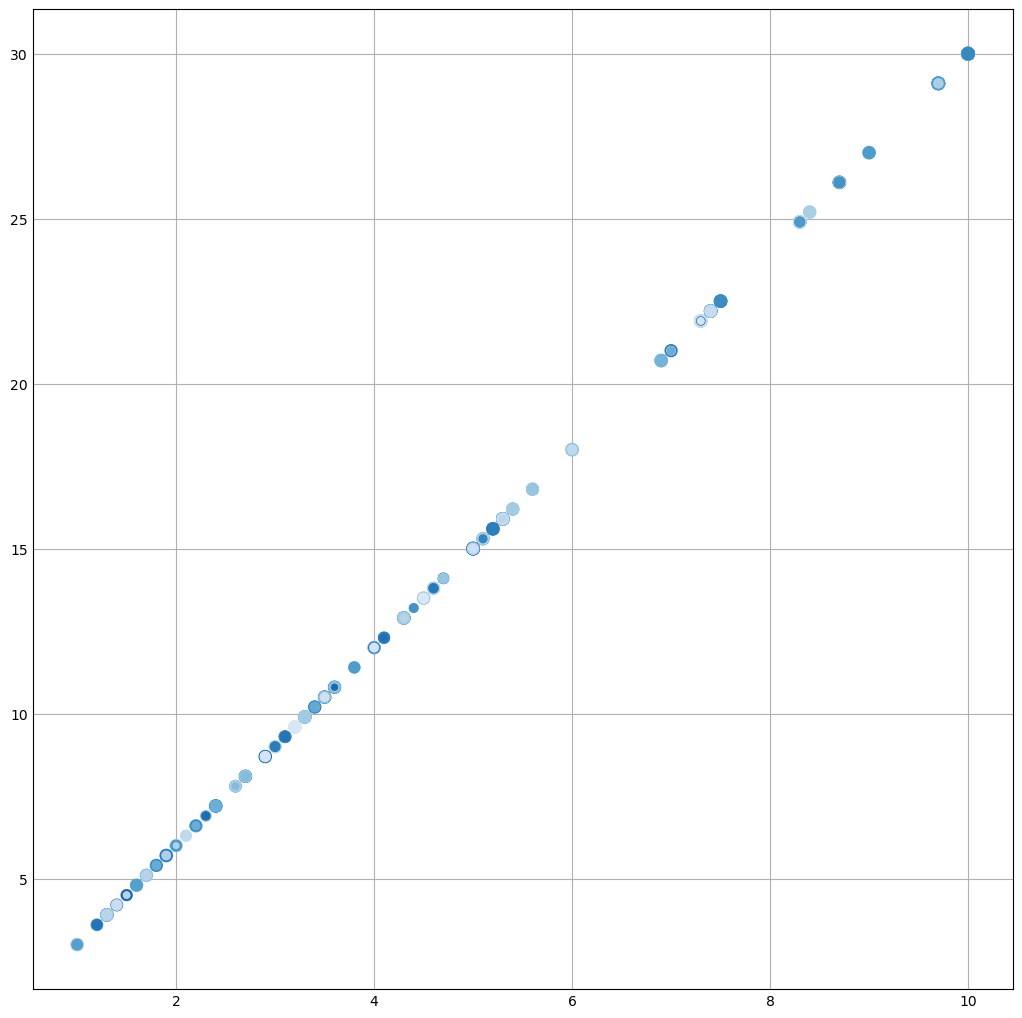

In [21]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

plt.show()